<a href="https://colab.research.google.com/github/Geetika2282/Deep-Learning/blob/main/tf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install tensorflow

In [177]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,confusion_matrix
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from IPython.display import display # Directly import display as function
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

In [147]:
# Function to plot loss curbe using tensorflow history object
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]

    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()

In [148]:
RANDOM_SEED = 42
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
rng = np.random.default_rng(RANDOM_SEED)
a = tf.zeros(4)

In [149]:
a

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

In [150]:
# HARD CODED VALUES IN CAPS AND IN 2ND CELL
RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.1
TEST_SIZE = 0.2
EPOCHS = 200



In [151]:

# Set the plotting parameters
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15,4),
          'axes.labelsize' : 'medium',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          #'text.usetex':True,
          #'text.latex.unicode':True
          }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.use('ggplot')



In [152]:
X, y = datasets.make_moons(n_samples=N_SAMPLE,
                           noise = NOISE ,
                           shuffle=True,
                           random_state=RANDOM_STATE)
X.shape , y.shape

((1000, 2), (1000,))

In [153]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

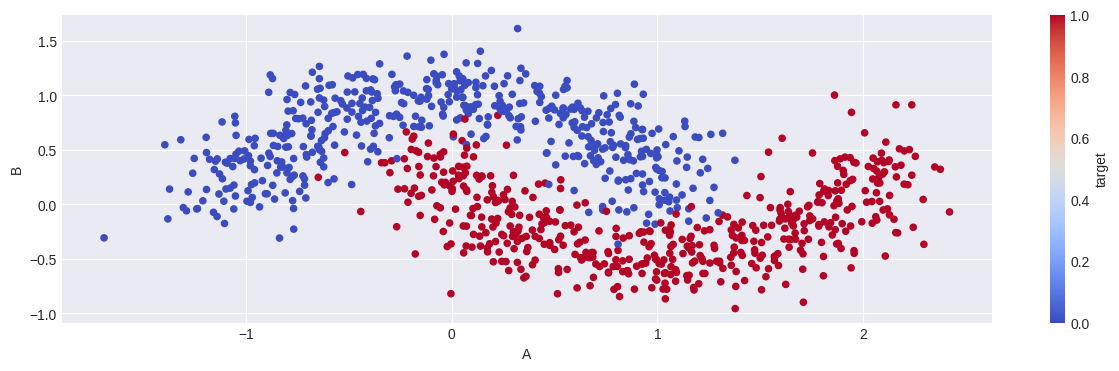

In [154]:

data_df.plot.scatter('A','B',c= 'target' ,cmap=CMAP)

In [155]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

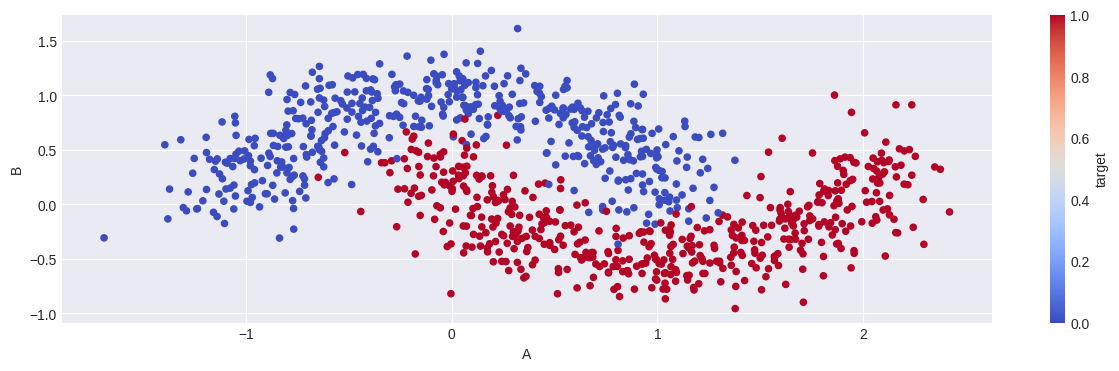

In [156]:
data_df.plot.scatter('A','B',c= 'target' ,cmap=CMAP)

In [157]:
y= pd.get_dummies(y).to_numpy()
type(y)

numpy.ndarray

In [158]:
def softmax(z):
  exp_scores = np.exp(z- np.max(z))  #For the safety we subtract, values will be negative but will not harm as it is exponential
  return exp_scores/ np.sum(exp_scores, axis=1, keepdims = True)


In [159]:
def fn_actv(z):
     return np.tanh(z)

def fn_actv_prime(z):

     return 1- (np.tanh(z))**2

In [160]:
fn_actv(np.array([[-1,0,1], [-np.inf,0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [161]:
def predict(model,X_p):
  W1,W2, W3, W4, W5= model['W1'],model['W2'],model['W3'],model['W4'], model['W5']

  b1,b2, b3, b4, b5= model['b1'],model['b2'],model['b3'],model['b4'], model['b5']


  # Forward propagation
  #Layer 1
  z1 = X_p.dot(W1) + b1  # Aggregation
  a1 = fn_actv(z1)      # Activation

  z2 = a1.dot(W2) + b2  # Aggregation
  a2 = fn_actv(z2)

  z3 = a2.dot(W3) + b3  # Aggregation
  a3 = fn_actv(z3)

  z4 = a3.dot(W4) + b4  # Aggregation
  a4 = fn_actv(z4)

  #Layer 5
  z5 = a4.dot(W5) + b5
  a5 = softmax(z5)

  return a5.argmax(axis=1)

In [162]:
def fn_calculate_loss(model,X_l,y_l):
  W1,W2, W3, W4, W5= model['W1'],model['W2'],model['W3'],model['W4'], model['W5']

  b1,b2, b3, b4, b5= model['b1'],model['b2'],model['b3'],model['b4'], model['b5']

  m = X_l.shape[0]
  # Forward propagation
  #Layer 1
  z1 = X_l.dot(W1) + b1  # Aggregation
  a1 = fn_actv(z1)       # Activation

  z2 = a1.dot(W2) + b2  # Aggregation
  a2 = fn_actv(z2)       # Activation

  z3 = a2.dot(W3) + b3  # Aggregation
  a3 = fn_actv(z3)       # Activation

  z4 = a3.dot(W4) + b4  # Aggregation
  a4 = fn_actv(z4)       # Activation

  #Layer 5
  z5 = a4.dot(W5) + b5
  a5 = softmax(z5)

  data_loss = -(y_l * np.log(a5) + (1-y_l) * np.log(1-a5)).sum()

  return  data_loss/m



In [163]:
# features_df = data_df.drop('target',axis=1)
# labels = data_df['target']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [165]:
type(X_train),type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [166]:
tf.keras.layers.Dense?

In [189]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,),name='input'),  # Input layer
    tf.keras.layers.Dense(5, activation='relu',name='fc_1'),
    tf.keras.layers.Dense(5, activation='relu',name='fc_2'),
    tf.keras.layers.Dense(4, activation='relu',name='fc_3'),
    tf.keras.layers.Dense(3, activation='relu',name='fc_4'),
    tf.keras.layers.Dense(2,name='output')
])

In [168]:
prediction = model(X_train[:1]).numpy()
prediction

array([[-0.4779411 , -0.03436923]], dtype=float32)

In [169]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [170]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                         │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

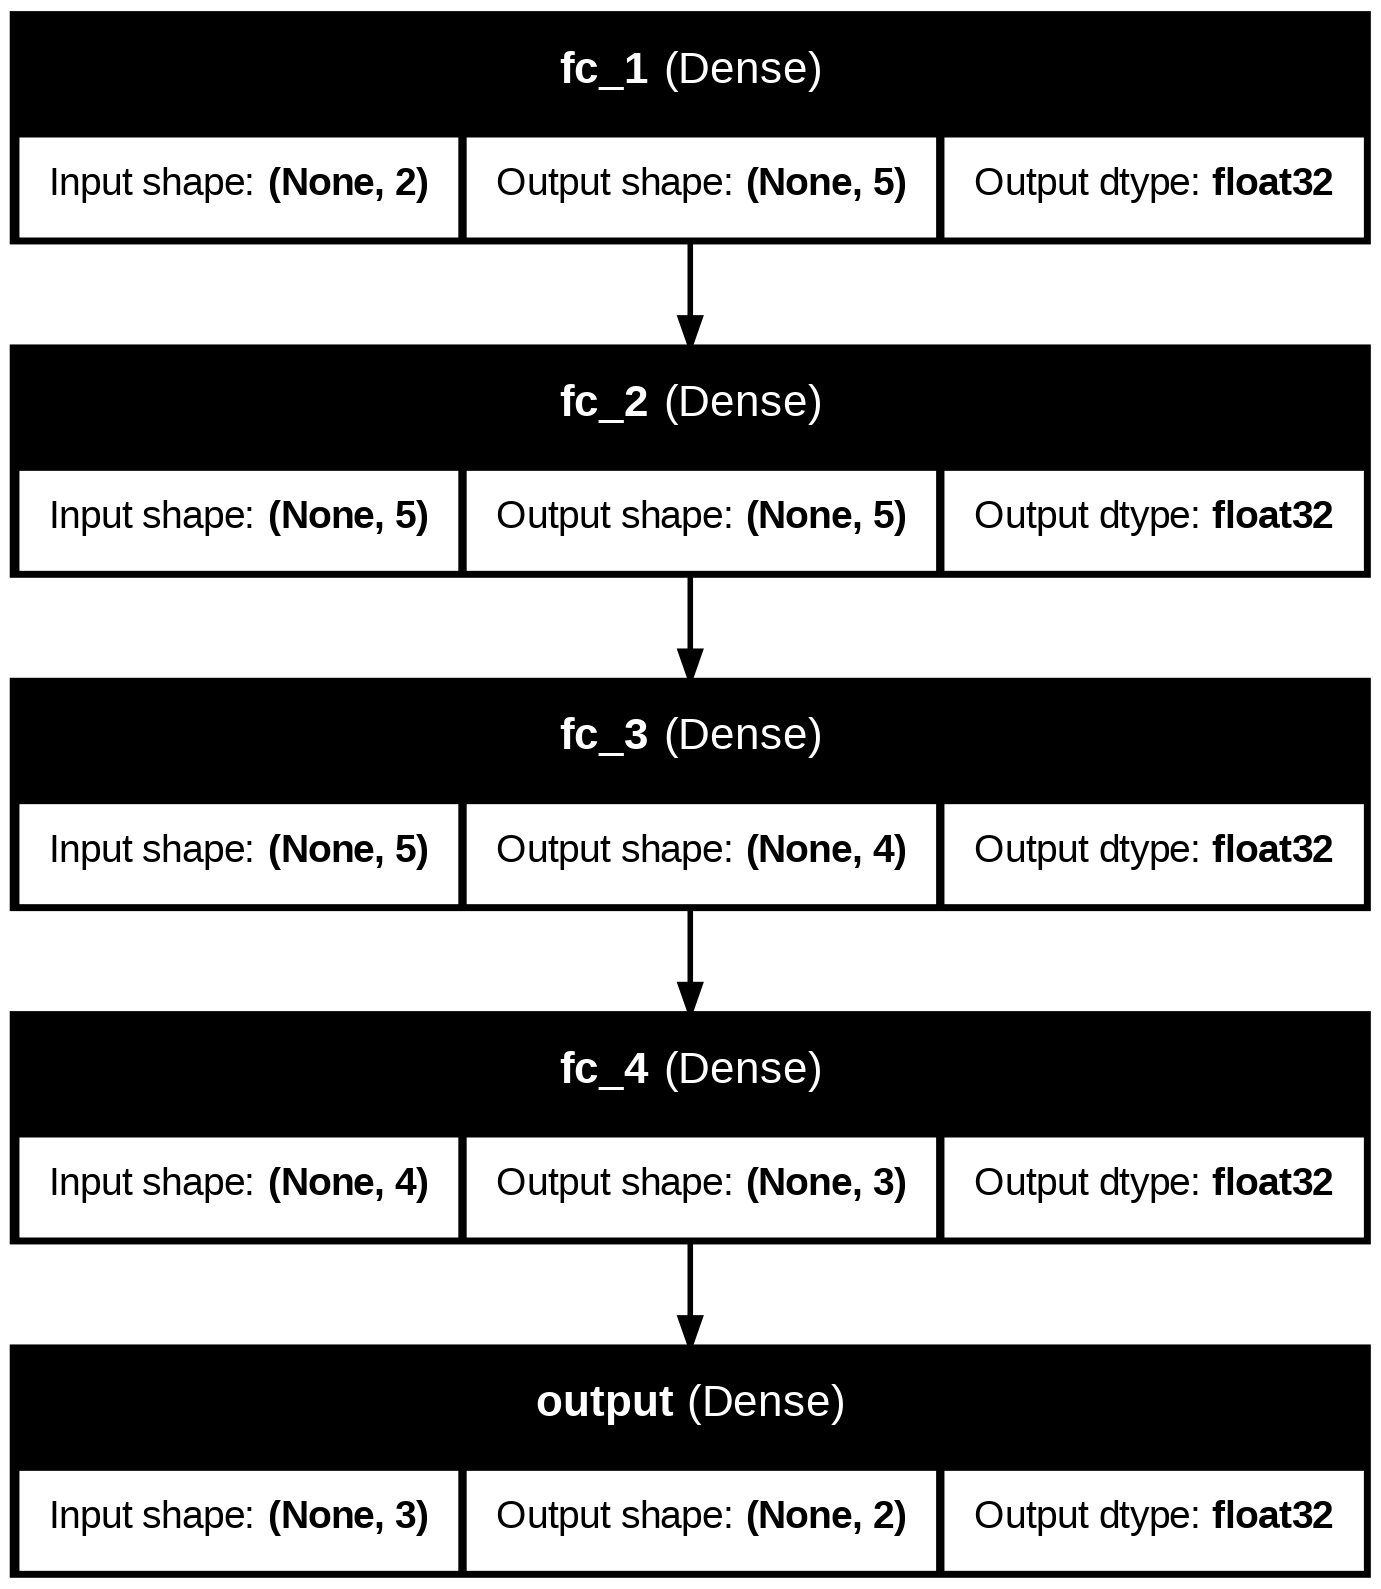

In [171]:
tf.keras.utils.plot_model(model, "my_first_model.png",
                          show_shapes=True,show_dtype=True,show_layer_names=True)

In [190]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [201]:
y_train.shape , prediction.shape

((800, 2), (1, 2))

In [205]:
y_train_transformed = np.argmax(y_train, axis=1)
y_test_transformed = np.argmax(y_test, axis=1)
loss_fn(y_train_transformed[:1],prediction).numpy()

0.93932855

In [206]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [207]:
history = model.fit(x=X_train, y=y_train_transformed,
                    validation_data = [X_test,y_test_transformed],
                    epochs=EPOCHS)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8072 - loss: 0.6731 - val_accuracy: 0.8850 - val_loss: 0.6506
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8733 - loss: 0.6464 - val_accuracy: 0.8950 - val_loss: 0.6197
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - loss: 0.6164 - val_accuracy: 0.9100 - val_loss: 0.5834
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.5813 - val_accuracy: 0.9050 - val_loss: 0.5415
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.5413 - val_accuracy: 0.8950 - val_loss: 0.4957
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.4985 - val_accuracy: 0.9000 - val_loss: 0.4481
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.4553 - val_accuracy: 0.9050 - val_loss: 0.4012
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8710 - loss: 0.4137 - val_accuracy: 0.9050 - 

,accuracy,loss,val_accuracy,val_loss
0,0.81750,0.667661,0.885,0.650624
1,0.87875,0.641247,0.895,0.619662
2,0.88500,0.610466,0.910,0.583418
3,0.88250,0.574547,0.905,0.541550
4,0.87875,0.533624,0.895,0.495682


<Axes: >

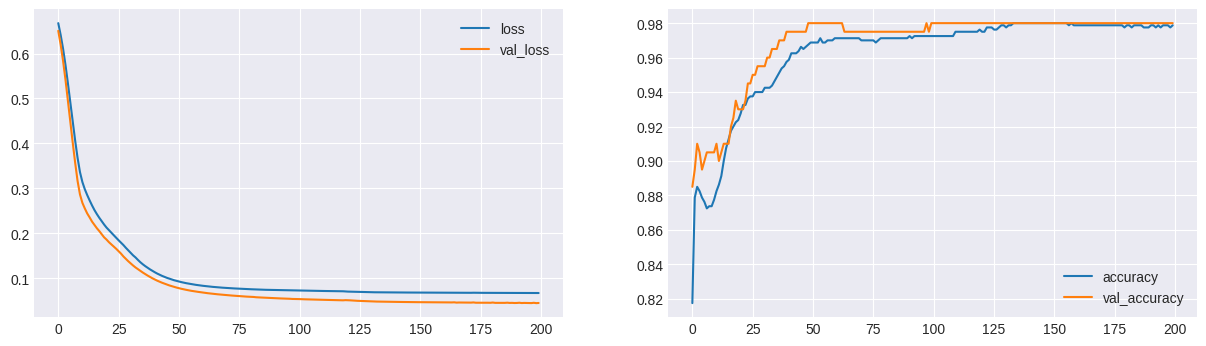

In [208]:
hist_df=pd.DataFrame(history.history)
display(hist_df.head())
fig,axes = plt.subplots(1,2)
hist_df.plot(y=['loss','val_loss'],ax=axes[0])
hist_df.plot(y=['accuracy','val_accuracy'],ax=axes[1])

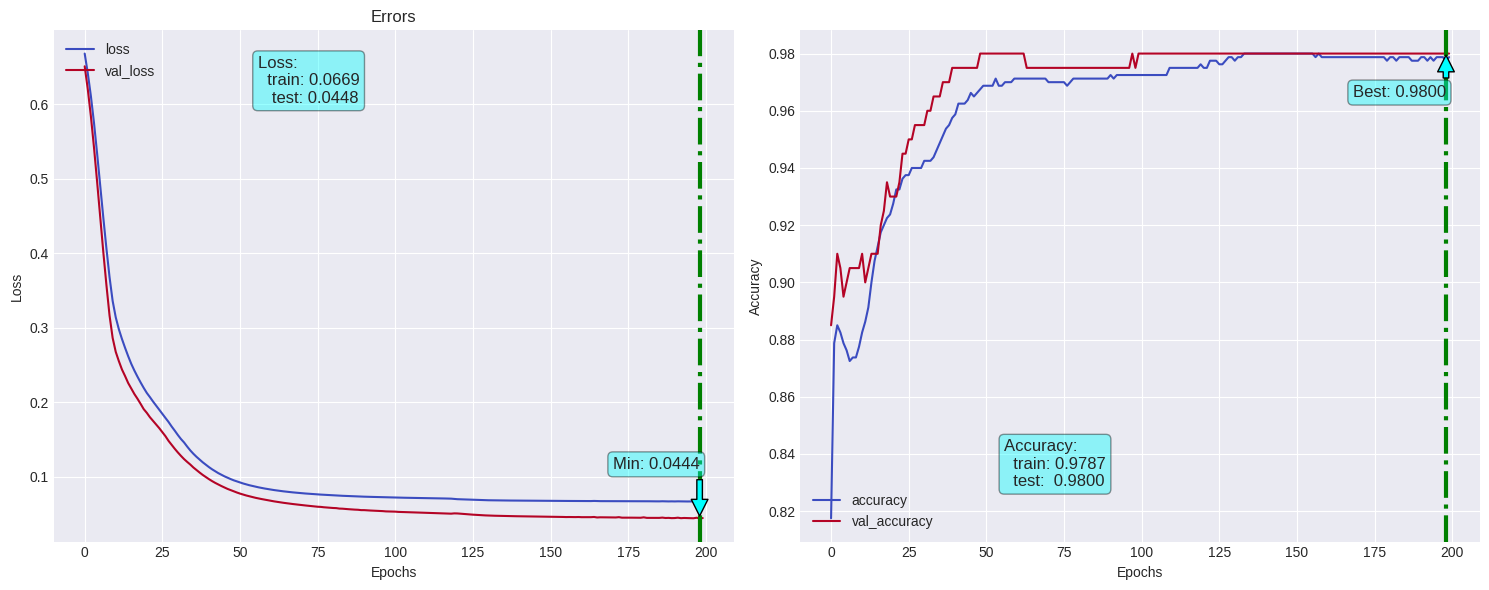

In [209]:
fn_plot_tf_hist(hist_df)

In [210]:
y_pred = model.predict(X_train)
accuracy_score(y_true=y_train_transformed , y_pred = y_pred.argmax(axis=1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.97875

In [197]:
def build_model(param,X_t, y_t, n_epochs=EPOCHS, alpha=ALPHA):
  '''
  2 - 4 - 1 (Nodes)
  '''

  rng = np.random.default_rng()

  #Get dimensions for weights init
  m = X_t.shape[0]

  #Initialise weights
  W1= rng.random((param[0], param[1]), dtype = np.float32) / np.sqrt(param[0])
  W2= rng.random((param[1], param[2]), dtype = np.float32) / np.sqrt(param[1])
  W3= rng.random((param[2], param[3]), dtype = np.float32) / np.sqrt(param[2])
  W4= rng.random((param[3], param[4]), dtype = np.float32) / np.sqrt(param[3])
  W5= rng.random((param[4], param[5]), dtype = np.float32) / np.sqrt(param[4])
  #Initialise bias
  b1 = np.zeros((1, param[1]), dtype = np.float32)
  b2 = np.zeros((1, param[2]), dtype = np.float32)
  b3 = np.zeros((1, param[3]), dtype = np.float32)
  b4 = np.zeros((1, param[4]), dtype = np.float32)
  b5 = np.zeros((1, param[5]), dtype = np.float32)
  print(W1.shape, W2.shape, W3.shape, W4.shape, W5.shape)
  print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape)

  curr_loss = 0
  loss = []
  epoch = []
  loss_hist = {}

  for i in range(n_epochs):
    ## Forward propagation
    #Layer 1
    z1 = X_t.dot(W1) + b1  # Aggregation
    a1 = fn_actv(z1)       # Activation

    #Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_actv(z2)

    #Layer 3
    z3 = a2.dot(W3) + b3
    a3 = fn_actv(z3)

    #Layer 4
    z4 = a3.dot(W4) + b4
    a4 = fn_actv(z4)

    #Layer 5
    z5 = a4.dot(W5) + b5
    a5 = softmax(z5)


    ##Back Propagation
    #Layer5
    dz5 = a5 - y_t  # y should be shape of (1,m)
    dW5 = (a4.T).dot(dz5)
    assert(W5.shape == dW5.shape) , f'Shape: W5 - {W5.shape} and dW5 - {dW5.shape}'
    db5 = np.sum(dz5, axis=0, keepdims=True)
    assert(b5.shape == db5.shape) , f'Shape: b5 - {b5.shape} and db5 - {db5.shape}'
    da4 = dz5.dot(W5.T)
    assert(a4.shape == da4.shape) , f'Shape: a4- {a4.shape} and da4 - {da4.shape}'

   #Layer 4
    dz4= da4 * fn_actv_prime(z4)
    dW4 = (a3.T).dot(dz4)
    assert(W4.shape == dW4.shape) , f'Shape: W4 - {W4.shape} and dW4 - {dW4.shape}'
    db4 = np.sum(dz4, axis=0, keepdims=True)
    assert(b4.shape == db4.shape) , f'Shape: b4 - {b4.shape} and db4 - {db4.shape}'
    da3 = dz4.dot(W4.T)
    assert(a3.shape == da3.shape) , f'Shape: a3- {a3.shape} and da3 - {da3.shape}'

    # Layer3
    dz3= da3 * fn_actv_prime(z3)
    dW3 = (a2.T).dot(dz3)
    assert(W3.shape == dW3.shape) , f'Shape: W3 - {W3.shape} and dW3 - {dW3.shape}'
    db3 = np.sum(dz3, axis=0, keepdims=True)
    assert(b3.shape == db3.shape) , f'Shape: b3 - {b3.shape} and db4 - {db3.shape}'
    da2 = dz3.dot(W3.T)
    assert(a2.shape == da2.shape) , f'Shape: a2- {a2.shape} and da2 - {da2.shape}'

    #lAYER 2
    dz2= da2 * fn_actv_prime(z2)
    dW2 = (a1.T).dot(dz2)
    assert(W2.shape == dW2.shape) , f'Shape: W2 - {W2.shape} and dW2 - {dW2.shape}'
    db2 = np.sum(dz2, axis=0, keepdims=True)
    assert(b2.shape == db2.shape) , f'Shape: b3 - {b2.shape} and db3 - {db2.shape}'
    da1 = dz2.dot(W2.T)
    assert(a1.shape == da1.shape) , f'Shape: a1- {a1.shape} and da1 - {da1.shape}'

    #LAYER 1
    dz1= da1* fn_actv_prime(z1)
    assert(z1.shape == dz1.shape) , f'Shape: z1 - {z1.shape} and dz1 - {dz1.shape}'
    dW1 = (X_t.T).dot(dz1)
    assert(W1.shape == dW1.shape) , f'Shape: W1 - {W1.shape} and dW1 - {dW1.shape}'
    db1 = np.sum(dz1, axis=0, keepdims=True)
    assert(b1.shape == db1.shape) , f'Shape: b1 - {b1.shape} and db1 - {db1.shape}'




    ### Gradient Update

    W1 +=  - alpha * dW1/m
    W2 +=  - alpha * dW2/m
    W3 +=  - alpha * dW3/m
    W4 +=  - alpha * dW4/m
    W5 +=  - alpha * dW5/m

    b1 +=  - alpha * db1/m
    b2 +=  - alpha * db2/m
    b3 +=  - alpha * db3/m
    b4 +=  - alpha * db4/m
    b5 +=  - alpha * db5/m

    model = {'W1':W1, 'W2':W2, 'W3':W3, 'W4':W4, 'W5':W5, 'b1':b1 , 'b2':b2, 'b3':b3 , 'b4':b4 , 'b5':b5 }


    if i%100 == 0 :
      curr_loss = fn_calculate_loss(model,X_t,y_t)
      loss.append(curr_loss)
      epoch.append(i)

    if i%1000 == 0:
      print(f'Loss after {i:>5d} epochs : {curr_loss:0.5f}')

  loss_hist['epoch'] = epoch
  loss_hist['loss'] = loss

  return model




In [180]:
loss_hist= {}
layer_params = [X_train.shape[1], 5, 5, 4, 3, y_train.shape[1]]
#y_train = y_train.reshape(-1,1)  #Not Required
#y_train.shape


In [181]:
layer_params

[2, 5, 5, 4, 3, 2]

In [182]:
model= build_model(layer_params, X_train, y_train)

(2, 5) (5, 5) (5, 4) (4, 3) (3, 2)
(1, 5) (1, 5) (1, 4) (1, 3) (1, 2)
Loss after     0 epochs : 1.42330


In [183]:
y_pred = predict(model, X_train)
accuracy_score(y_true=y_train.argmax(axis=1), y_pred=y_pred)

0.8225

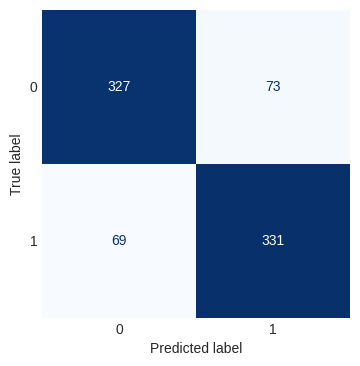

In [184]:


cm= confusion_matrix(y_true=y_train.argmax(axis=1), y_pred=y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar= False)
ax.grid(False)